# Project: Investigate a Dataset - TMDb_movie_data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

>This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.
>Certain columns, like ‘cast’ and ‘genres’, contain multiple values separated by pipe (|) characters.
The final two columns ending with “_adj” show the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time.

### Question(s) for Analysis
>**Question 1: What is distribution of Gross Revenue and the relation between Net Profit, Popularity and Rating**

>**Question 2: Actors with the most appearances**

>**Question 3: Which Movies have the highest net profit, budget, revenue**

>**Question 4: Which Movies have the Lowest net profit, budget, revenue**

>**Question 5: Which genres are most popular from year to year?**

>**Question 6: What is movies' average run time?**

In [1]:
# Upgrade pandas to use dataframe.explode() function. 
#!pip install --upgrade pandas==0.25.0 --quiet;
#!pip install --upgrade seaborn --quiet;

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set(style="whitegrid", context="notebook", font_scale=1.5)
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

In [3]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('Database_TMDb_movie_data//tmdb-movies.csv')

In [4]:
pd.set_option('display.max_columns', None)
display(df.head(2))
print("Original shape of the df: ", df.shape)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


Original shape of the df:  (10866, 21)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [6]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


/opt/conda/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/opt/conda/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/opt/conda/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/opt/conda/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:3

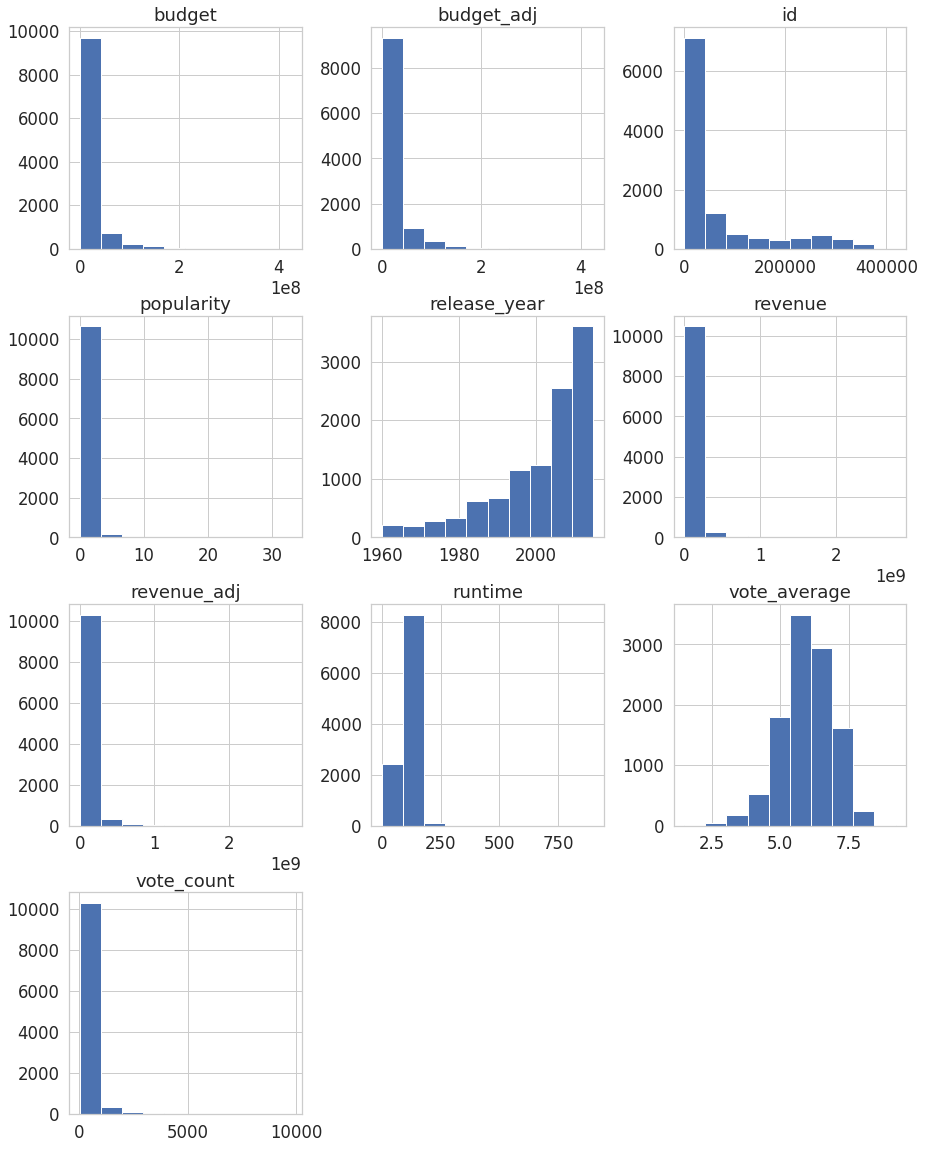

In [7]:
df.hist(figsize=(15,20));


### Data Cleaning

> **After investigating the Dataset:** 
1. We will drop unnecessary columns such as imdb_id, homepage, tagline, keywords, production companies, overview, budget_adj, revenue_adj
2. Will check for duplicates and drop them
3. Change relase_date to datetime
4. Drop Zero budget, Zero revenue, Zero runtime and all other null entries
5. Will assume budget and revenue in USD dollars to calculate profit



In [8]:
#Step no. 1: drop unnecessary columns for this analysis procedure
df.drop(['imdb_id', 'homepage', 'tagline', 'keywords', 'production_companies',
         'overview', 'budget_adj', 'revenue_adj', 'vote_count'], axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 12 columns):
id                10866 non-null int64
popularity        10866 non-null float64
budget            10866 non-null int64
revenue           10866 non-null int64
original_title    10866 non-null object
cast              10790 non-null object
director          10822 non-null object
runtime           10866 non-null int64
genres            10843 non-null object
release_date      10866 non-null object
vote_average      10866 non-null float64
release_year      10866 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 1018.8+ KB


In [9]:
#Check if df has duplicates
df.duplicated().sum()

1

In [10]:
#Step 2: Drop Duplicates
df.drop_duplicates(inplace=True)

In [11]:
#Step 3: Change release date to datetime
df['release_date'] = pd.to_datetime(df['release_date'])

In [12]:
#Step 4: Change all zeros in budget, revenue and runtime to np.NAN to be dropped
df[['budget', 'revenue', 'runtime']] = df[['budget', 'revenue', 'runtime']].replace(0, np.NAN)
df.dropna(inplace=True)

In [13]:
#Step 5: Calculate the net profit
df.insert(4, 'net_profit', df['revenue'] - df['budget'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3849 entries, 0 to 10848
Data columns (total 13 columns):
id                3849 non-null int64
popularity        3849 non-null float64
budget            3849 non-null float64
revenue           3849 non-null float64
net_profit        3849 non-null float64
original_title    3849 non-null object
cast              3849 non-null object
director          3849 non-null object
runtime           3849 non-null float64
genres            3849 non-null object
release_date      3849 non-null datetime64[ns]
vote_average      3849 non-null float64
release_year      3849 non-null int64
dtypes: datetime64[ns](1), float64(6), int64(2), object(4)
memory usage: 421.0+ KB


<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1 (What is distribution of Gross Revenue and the relation between Net Profit, Popularity and Rating)

>**1.1 Histogram of Gross Revenue**: to check how much most movies gain in average

In [14]:
pd.DataFrame(df['revenue'].describe())

,revenue
count,3.849000e+03
mean,1.078148e+08
std,1.766175e+08
min,2.000000e+00
25%,1.367069e+07
50%,4.490726e+07
75%,1.243052e+08
max,2.781506e+09


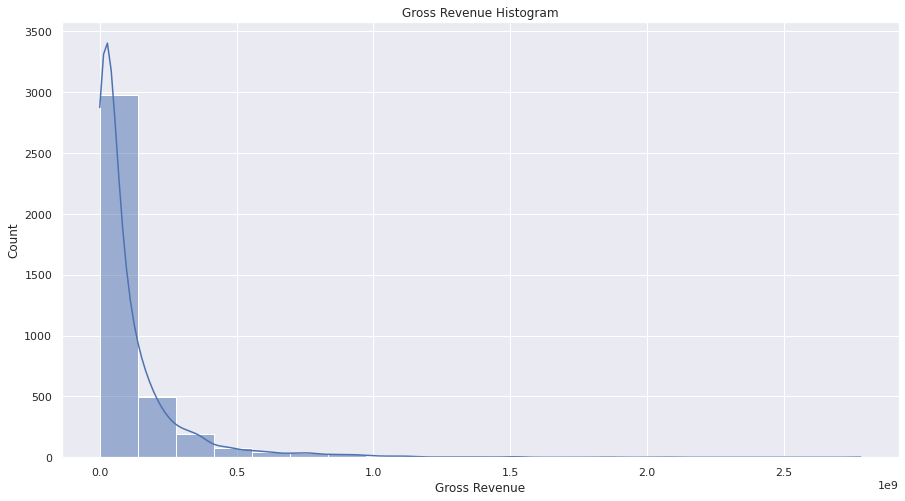

In [15]:
sns.set(rc={'figure.figsize':(15,8)})
g = sns.histplot(data=df, x='revenue', bins=20, kde=True)
g.set_xlabel('Gross Revenue')
g.set_title('Gross Revenue Histogram');

>As concluded from the previous plot most movies make gross revenue less than 500,000,000$ as per dataset

>**1.2.Scatter plot of Net Profit vs Popularity:**
the relation between them is direct as can be seen below


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


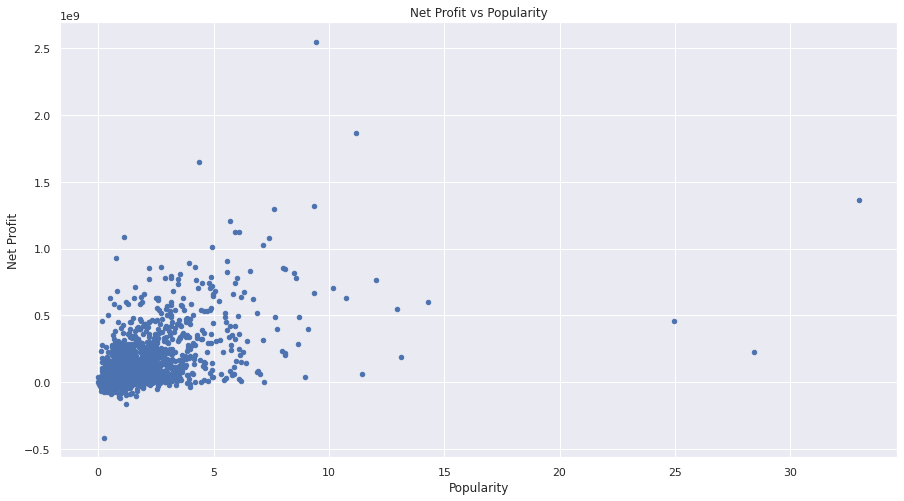

In [16]:
df.plot(kind='scatter', x='popularity', y='net_profit', grid=True, figsize=(15,8))
plt.title('Net Profit vs Popularity')
plt.xlabel('Popularity')
plt.ylabel('Net Profit');

>**1.3.Scatter plot of Popularity vs Rating:**
the relation between them is direct as can be seen below

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


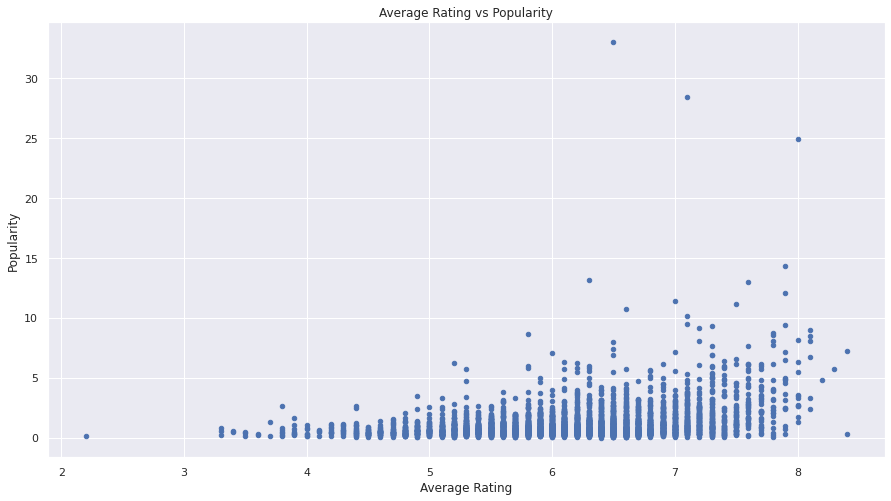

In [17]:
df.plot(kind='scatter', y='popularity', x='vote_average', grid=True, figsize=(15,8))
plt.title('Average Rating vs Popularity')
plt.ylabel('Popularity')
plt.xlabel('Average Rating');

>**1.4.Scatter plot of Net Profit vs Rating:**
the relation between them is direct as can be seen below

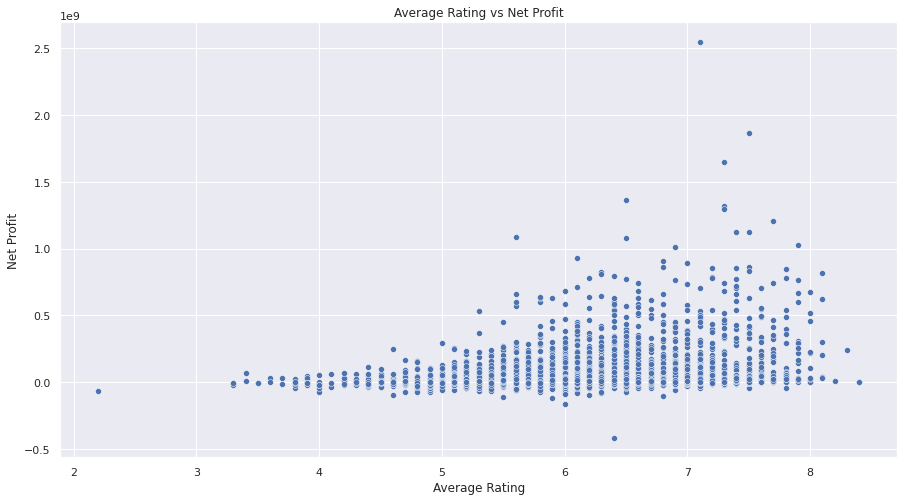

In [18]:
#df.plot(kind='scatter', y='net_profit', x='vote_average', grid=True, figsize=(8,5))
sns.scatterplot(y='net_profit', x='vote_average', data=df)
plt.title('Average Rating vs Net Profit')
plt.ylabel('Net Profit')
plt.xlabel('Average Rating');

### Research Question 2  (Actors with the most appearances)

>**Creating a dictionary of actors and how many films did they cast**


In [19]:
actors_dict = {}

actors = df["cast"]
actors = actors.str.split("|")
for actorList in actors:
    for actor in actorList:
        actor = actor.strip()
        actors_dict[actor] = actors_dict.get(actor, 0) + 1

#Sort list according with no. of appearances
sorted_actors = sorted(actors_dict.items(), key=lambda x: x[1], reverse=True)

/opt/conda/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


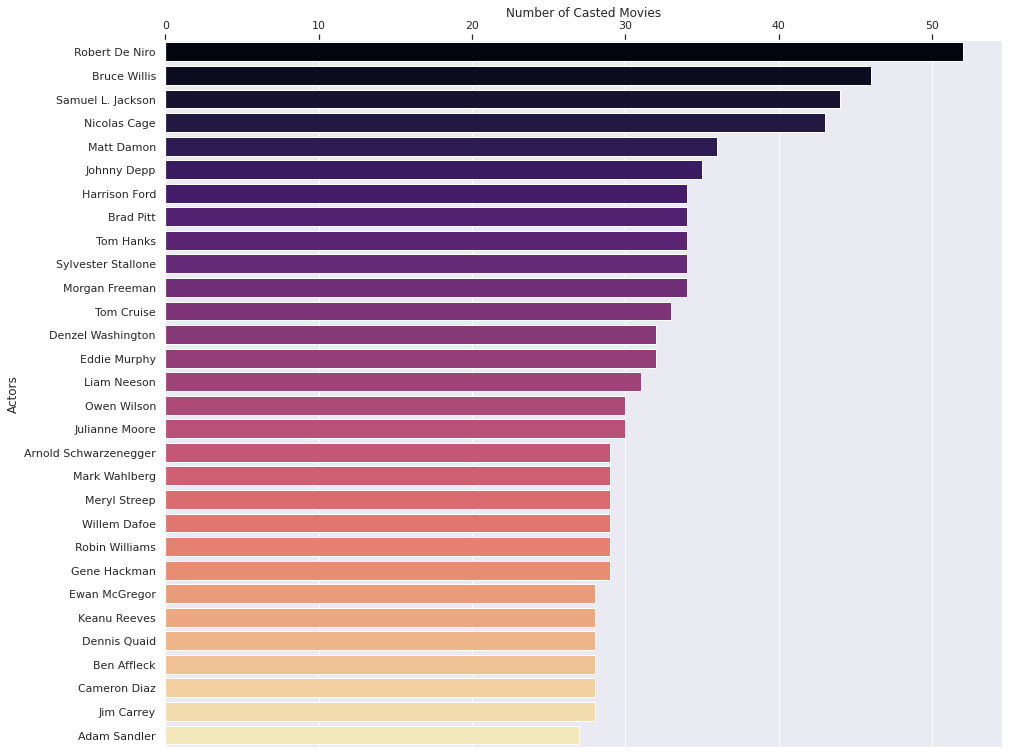

In [20]:
#Get top 30 actors
x_axis = []
y_axis = []

for name, num_movies in sorted_actors[:30]:
    x_axis.append(num_movies)
    y_axis.append(name)

sns.set(rc={'figure.figsize':(15,13)})
g = sns.barplot(x_axis, y_axis, palette='magma');
g.xaxis.set_ticks_position("top")
g.xaxis.set_label_position('top') 
plt.xlabel('Number of Casted Movies')
plt.ylabel('Actors');

The top 5 actors with the highest number of appearances are Robert De Niro, Bruce Willis, Samuel L. Jackson, Nicolas Cage and Matt Damon.

### Research Question 3  (Which Movies have the highest net profit, budget, revenue)

In [21]:
#Make a copy of the DF and sort accroding to net profit column
def top_movies(column, numberofmovies=20, asc=False):
    top_movies_df = df.copy()
    top_movies_df.sort_values(column, ascending=asc, inplace=True)
    top_movies_df.reset_index(drop=True, inplace=True)
    return top_movies_df[:numberofmovies]

/opt/conda/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


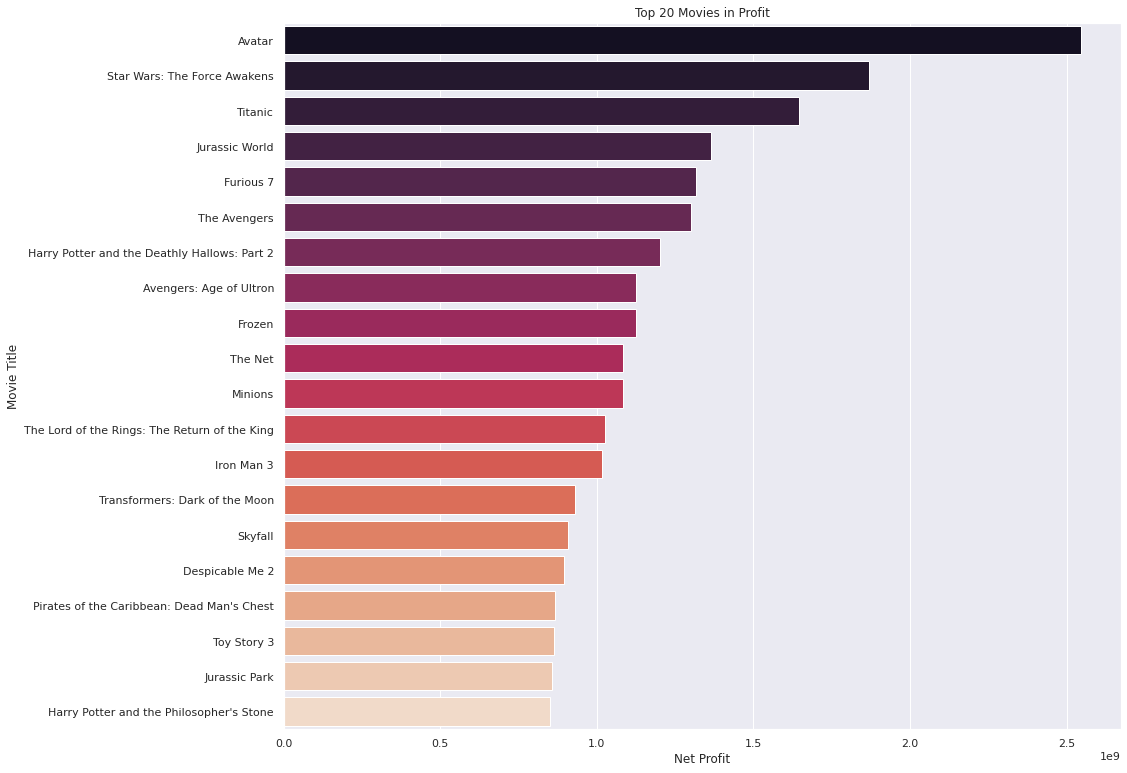

In [22]:
top_20_net = top_movies('net_profit')
sns.barplot(top_20_net.net_profit, top_20_net.original_title, palette='rocket');
plt.xlabel('Net Profit')
plt.ylabel('Movie Title')
plt.title('Top 20 Movies in Profit');

The top 5 movies with the highest net profit are Avatar, Star Wars, Titanic, Jurassic World and Furious 7.

/opt/conda/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


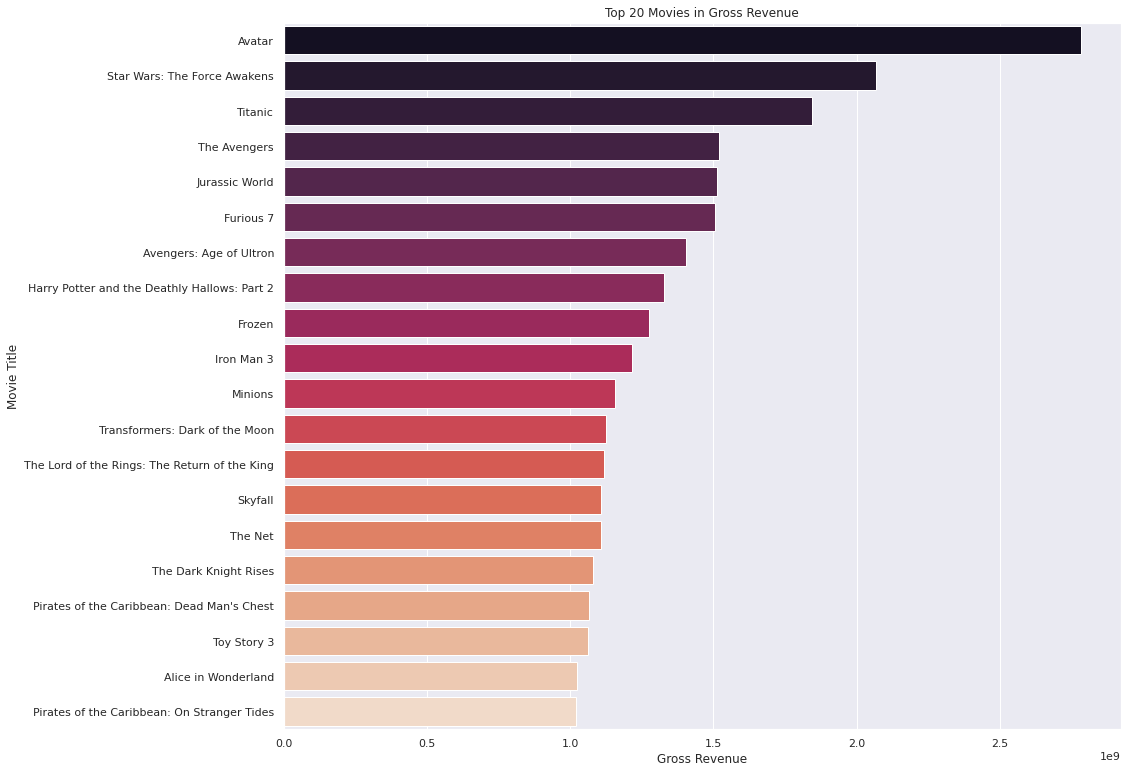

In [23]:
top_20_rev = top_movies('revenue')
sns.barplot(top_20_rev.revenue, top_20_rev.original_title, palette='rocket');
plt.xlabel('Gross Revenue')
plt.ylabel('Movie Title')
plt.title('Top 20 Movies in Gross Revenue');

The top 5 movies with the highest gross revenue are Avatar, Star Wars, Titanic, The Avengers and Jurassic World.

/opt/conda/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


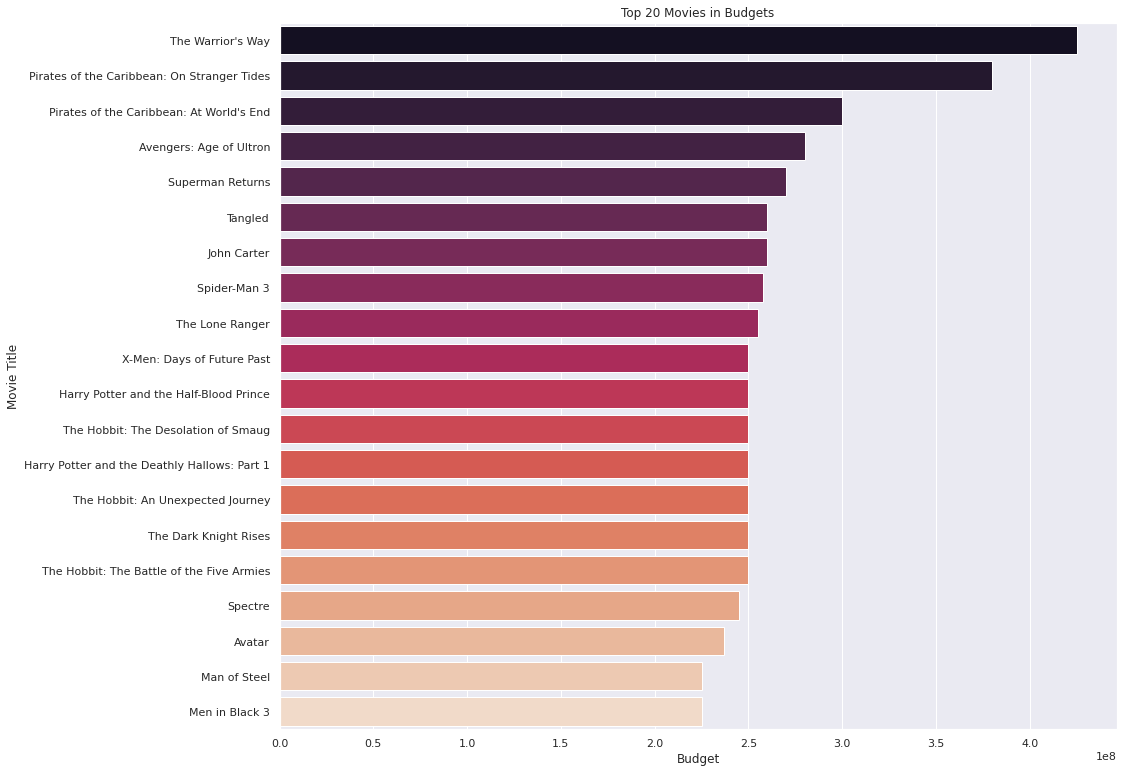

In [24]:
top_20_bud = top_movies('budget')
sns.barplot(top_20_bud.budget, top_20_bud.original_title, palette='rocket');
plt.xlabel('Budget')
plt.ylabel('Movie Title')
plt.title('Top 20 Movies in Budgets');

The top 5 movies with the highest budget are The Warrior's Way, Pirate of the Carribean, Avengers, Superman, Tangled.

### Research Question 4  (Which Movies have the Lowest net profit, revenue)

/opt/conda/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


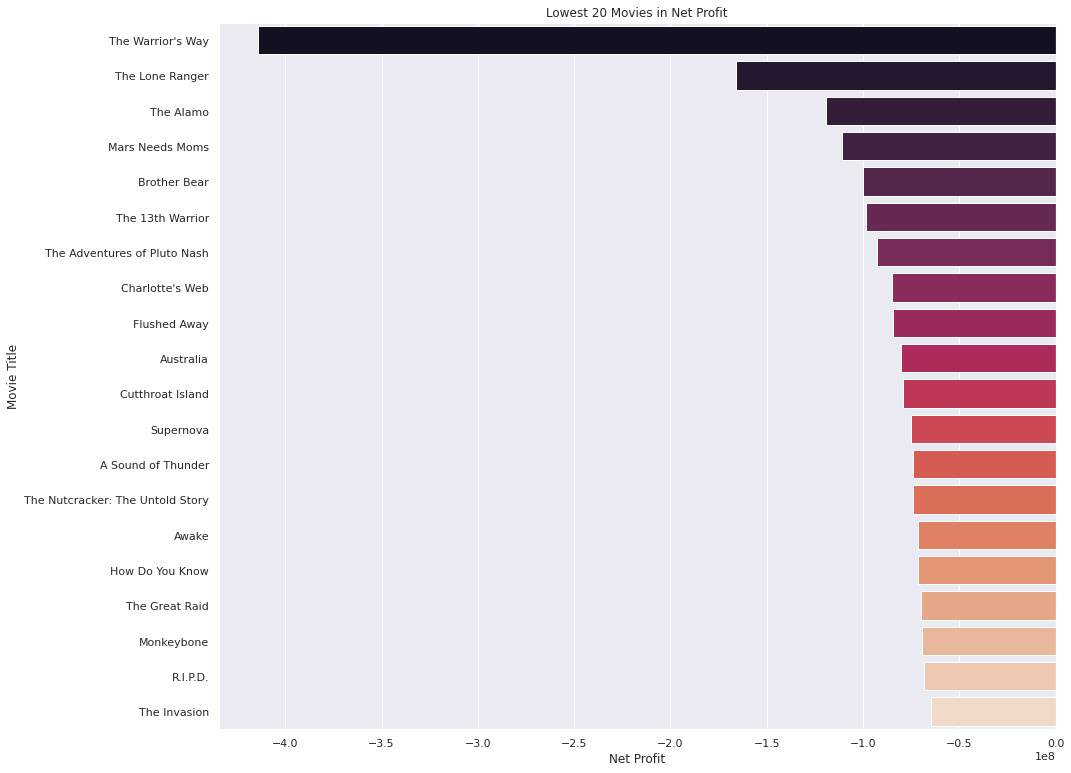

In [25]:
lowest_20_net = top_movies('net_profit', 20, True)
sns.barplot(lowest_20_net.net_profit, lowest_20_net.original_title, palette='rocket');
plt.xlabel('Net Profit')
plt.ylabel('Movie Title')
plt.title('Lowest 20 Movies in Net Profit');

The highest 5 movies with loss are The Warrior's Way, Lone Ranger, The Alamo, Mars needs moms, Brother Bear.

/opt/conda/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


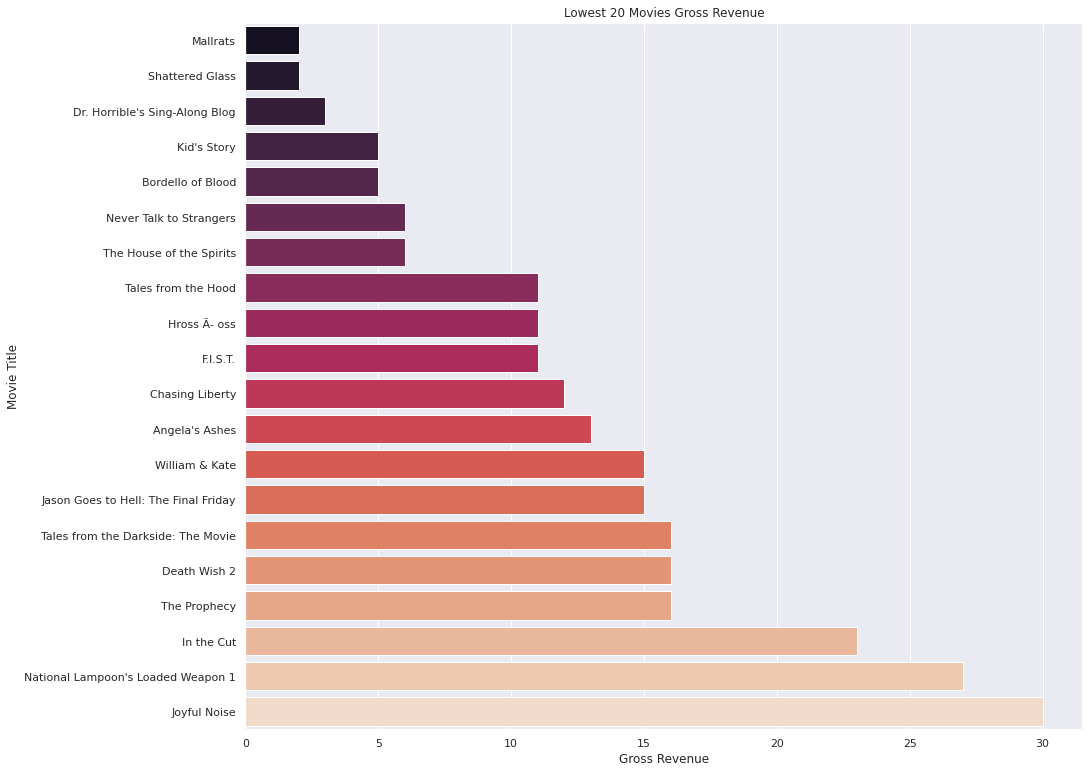

In [26]:
lowest_20_rev = top_movies('revenue', 20, True)
sns.barplot(lowest_20_rev.revenue, lowest_20_rev.original_title, palette='rocket');
plt.xlabel('Gross Revenue')
plt.ylabel('Movie Title')
plt.title('Lowest 20 Movies Gross Revenue');

The lowest 5 movies in gross revenue are Mallrats, Shattered Glass, Dr.Horrible, Kid's Story, Bordello of Blood.

### Research Question 5  (Which genres are most popular from year to year? )

In [27]:
# Create a copy from the df and convert genre of each movie to a list
df_gen = df.copy()
df_gen['genres'] = df_gen['genres'].str.split('|')

In [28]:
#Split list of genres of each to movie to a separate row
df_gen = df_gen.explode('genres')

In [29]:
#Group by Genres and Release year and get mean of popularity for each genre per year
# then get the most popular genre per year to plot it
df_gen2 = df_gen.groupby(['release_year','genres'])['popularity'].mean().groupby(level='release_year').nlargest(1).reset_index(level=0, drop=True)
df_gen2 = df_gen2.reset_index()

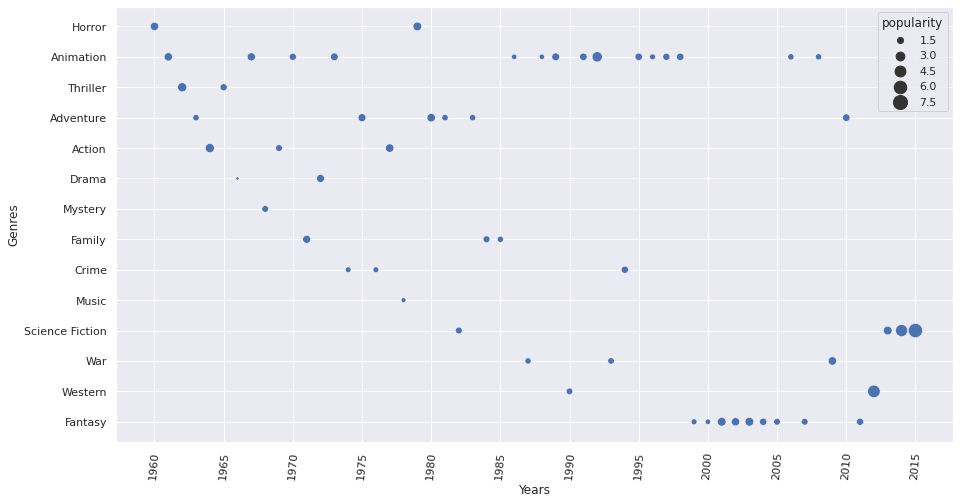

In [30]:
sns.set(rc={'figure.figsize':(15,8)})

g = sns.scatterplot(
    data=df_gen2,
    x="release_year", y="genres",
     size="popularity",
    palette='rocket', sizes=(10, 200))
g.set_xticks(np.arange(1960, 2016, 5))
for tick in g.get_xticklabels():
    tick.set_rotation(85)
g.xaxis.grid(True)
g.yaxis.grid(True)
g.set_xlabel('Years')
g.set_ylabel('Genres');

> We can notice that the most popular genre in the last 3 years (2013,2014,2015) is Sci-fi and between 1999 till 2005 the most popular genre is Fantasy

In [31]:
#How many films per Genre?
genre_counts = df_gen['genres'].value_counts()

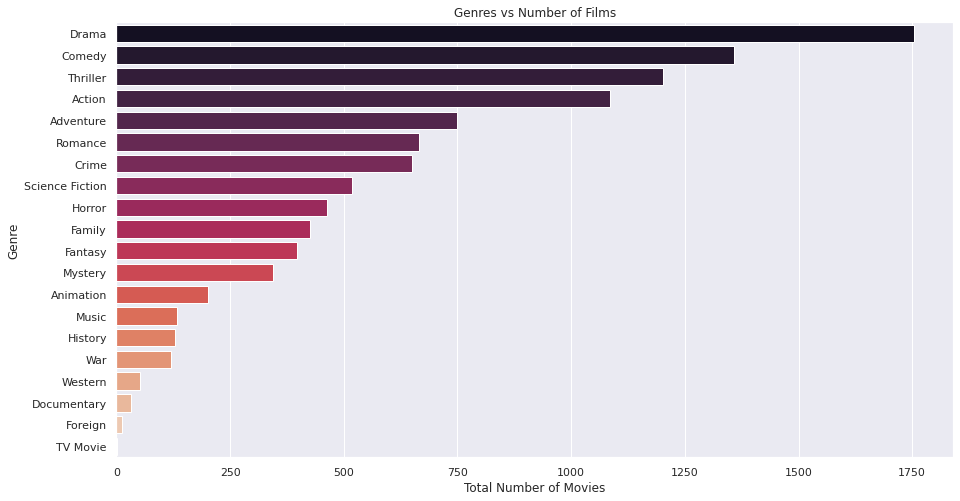

In [32]:
sns.barplot(y=genre_counts.index, x=genre_counts.values, palette='rocket');
plt.xlabel('Total Number of Movies')
plt.ylabel('Genre')
plt.title('Genres vs Number of Films');

> Drama is the most filmed genre followed by comedy, thriller and action movies

### Research Question 6  (What is movies' average run time? )

In [33]:
pd.DataFrame(df['runtime'].describe())

,runtime
count,3849.000000
mean,109.217459
std,19.914141
min,15.000000
25%,95.000000
50%,106.000000
75%,119.000000
max,338.000000


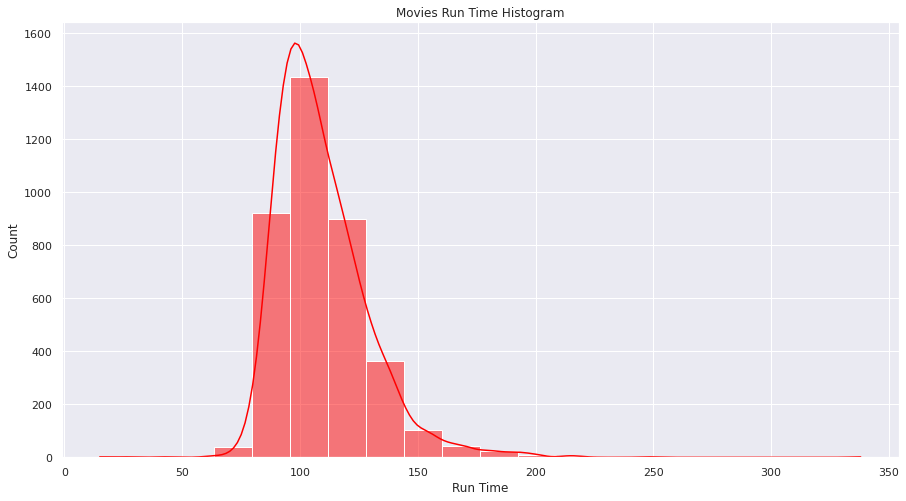

In [34]:
sns.set(rc={'figure.figsize':(15,8)}, style='darkgrid')
g = sns.histplot(data=df, x='runtime', bins=20, kde=True, palette='rocket', color='red')
g.set_xlabel('Run Time')
g.set_title('Movies Run Time Histogram');

>It's concluded that average run time for movies is around 110 mins and the histogram is right skewed.

<a id='conclusions'></a>
## Conclusions

**Question 1: What is distribution of Gross Revenue and the relation between Net Profit, Popularity and Rating**
>From Scatter plots we can see that the relation is direct proportional between the 3 variables

**Question 2: Actors with the most appearances**
>As per barblot we conclude that the top actors with the most movies are Robert De Niro, Bruce Willis, Samuel L. Jackson, Nicolas Cage and Matt Damon.

**Question 3: Which Movies have the highest net profit, budget, revenue**
>As per barplots we conclude that Avatar is the most profitable movie as per dataset in terms of (Net Profit)

**Question 4: Which Movies have the Lowest net profit, budget, revenue**
>As per barplots we conclude that The Warrior's Way is the most loss-making movie as per dataset in terms of (Net Profit)

**Question 5: Which genres are most popular from year to year?**
>As per scatterplot we conclude can find that science fiction is the most popular genre in the last 3 years in the dataset, meanwhile since 1999 till 2005 the most popular genre was Fantasy, noting that the most filmed genre was Drama followed by Comedy, Thriller and Action movies.

**Question 6: What is movies' average run time?**
>It's concluded that average run time for movies is around 110 mins and the histogram is right skewed, with the shortest movie is 15 mins long and the longest movie is 338 mins.

**Limitations**
>Found alot of missing data or zero values in revenue, budget and runtime columns which reduced the total number of enteries significantly.


## Submitting your Project 


In [35]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0